
#Perform the following operations using R/Python on the data sets:
#a) Compute and display summary statistics for each feature available in the dataset. (e.g. minimum value, maximum value, mean, range, standard deviation, variance and percentiles
#b) Data Visualization-Create a histogram for each feature in the dataset to illustrate the feature distributions.
#c) Data cleaning, Data integration, Data transformation, Data model building (e.g. Classification)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics

In [33]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")

In [34]:
# Display the first few rows
display(df.head())

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [35]:
# Summary statistics
print(df.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

In [36]:
# Check for missing values
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


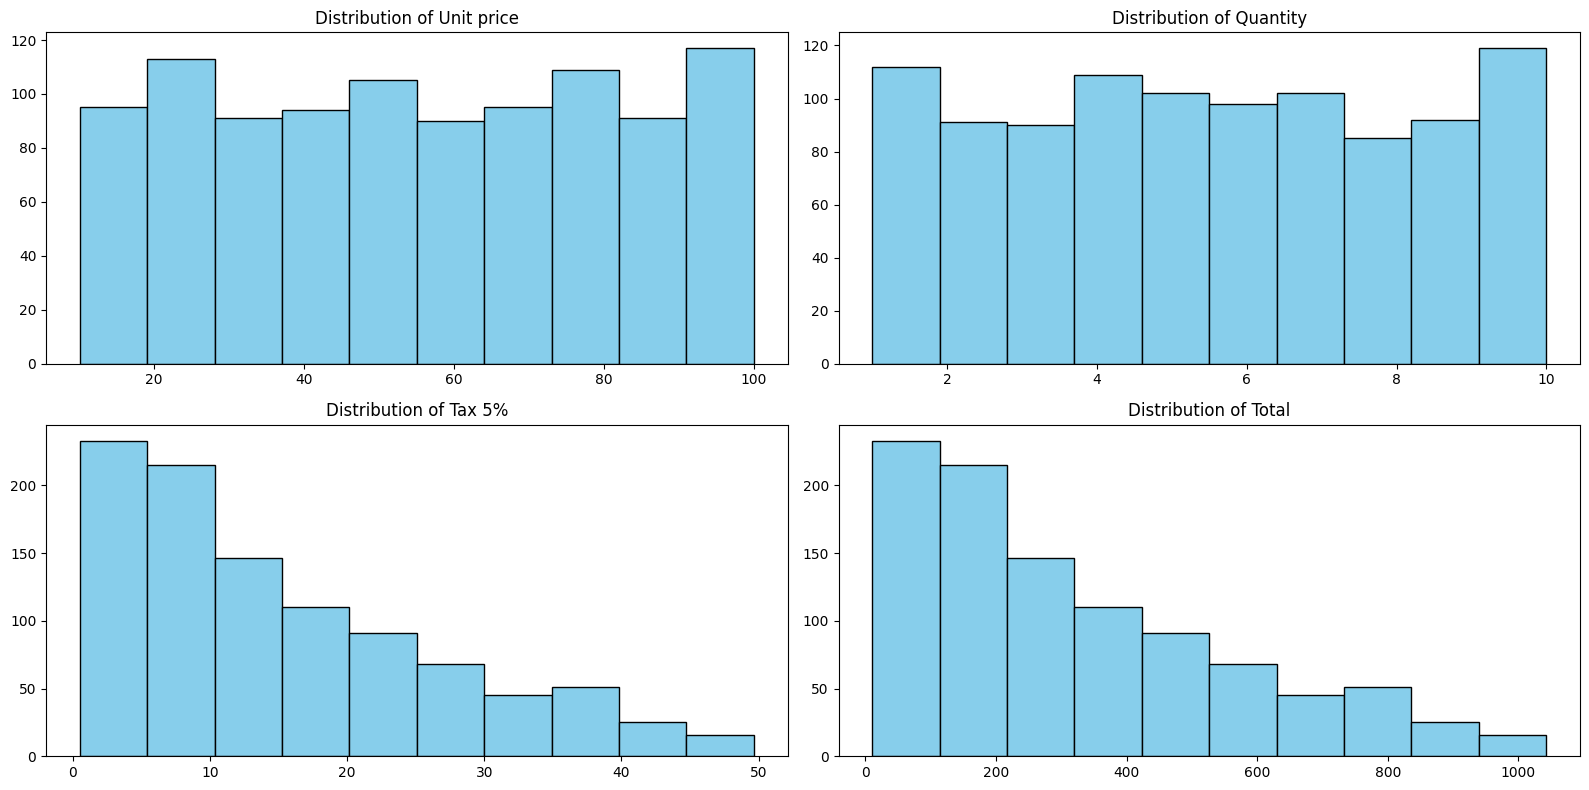

In [37]:
# Data visualization - Histograms
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
columns_to_plot = df.select_dtypes(include=[np.number]).columns[:4]  # Select numerical columns

for i, col in enumerate(columns_to_plot):
    ax = axes[i // 2, i % 2]
    ax.set_title(f"Distribution of {col}")
    ax.hist(df[col], color="skyblue", edgecolor="black")

plt.tight_layout()
plt.show()

In [38]:
print(df.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [39]:
# Prepare data for model
X = df.drop(columns=['Invoice ID'])  # Drop ID column directly from the original DataFrame
X = X.select_dtypes(include=[np.number]) # Select numerical features
y = df["Branch"]  # Assuming 'Branch' is a classification target

In [46]:
# Prepare data for regression model
X = df.select_dtypes(include=[np.number])  # Select numerical features
X = X.drop(columns=['gross income'], errors='ignore') # Drop 'gross income' if it exists
# If Branch is Numerical and needs to be dropped:
#X = X.drop(columns=['Branch'], errors='ignore')
y = df["gross income"]  # Assuming 'gross income' is the target for regression

In [47]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
# Make predictions
y_pred = regressor.predict(X_test)

In [50]:
# Model evaluation for regression
print("Mean absolute error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_test, y_pred))
print("R2 score: ", metrics.r2_score(y_test, y_pred))

Mean absolute error:  1.5948353748740374e-15
Mean squared error:  5.347675750541595e-30
R2 score:  1.0
